# In your own words, what is the standard deviation?

# If you had a to pick an emoji that represents your feelings towards a z-score what would you pick?

# In your own words, what is a z-score?

# Are there any general properties of a z-score?

In [6]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('seaborn-darkgrid')

In [25]:
# Learn some properties about the zscore
# What affects the z-score and it's distribution?
# Why do we want to discuss stuff using zscore vs another metric?
np.random.seed(12345)

In [63]:
norm = np.random.normal(size = 5000, loc = 50, scale = 10)
norm6 = np.random.normal(size = 10000, loc=50, scale = 50)
# distribution looking normal is somewhat proportional to the size

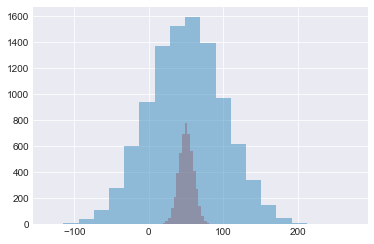

In [72]:
plt.hist(norm, bins=20, alpha=0.5, label='norm')
plt.hist(norm6, bins=20, alpha=0.5, label='norm6')
plt.show()

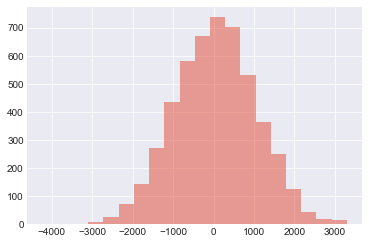

In [39]:
plt.hist(norm, bins=20, alpha=0.5)
plt.show()

In [53]:
mu, sd = 50, 10

In [54]:
def z_score(x, mu, sd):
    return (x - mu)/sd

In [45]:
def z_score_list(data, mu, sd):
    """
    input
    mu : mean of distribution
    sd : standard deviation 
    data : list of data points
    
    return
    list of all of the z-scores of a distribution
    """
    z_scores = []
    for x in data:
        z_scores.append(z_score(x, mu, sd))
    return z_scores

In [75]:
normz = z_score_list(norm, mu, sd)
normz6 = z_score_list(norm6, mu, 50)

In [70]:
muz = np.mean(normz6)
sdz = np.std(normz6)


muz, sdz

(0.008217912290900516, 0.9931976650034208)

In [78]:
norm

array([47.84974947, 43.11698152, 50.67302805, ..., 46.67084273,
       50.78190769, 49.70520912])

In [79]:
norm6

array([-30.07364727,  47.22696209,  52.73790251, ...,  35.16122599,
       146.87636511, 104.13079748])

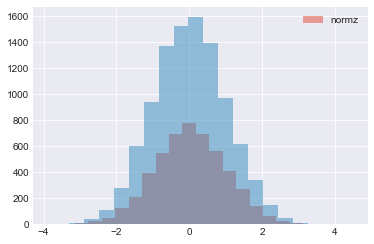

In [74]:
plt.hist(normz, bins=20, alpha=0.5, label='normz')
plt.hist(normz6, bins=20, alpha=0.5)
plt.legend()
plt.show()

In [ ]:
# Lowest case scenario
z = (-4sd)/sd
  = -4

# highest case scenario

z = (4sd - 0sd) / sd
  = 4sd / sd
  = 4

# Standard Normal Distribution

## Introduction
In this lesson, we will introduce a special case of normal distributions called "The Standard Normal Distribution".

## Objectives

You will be able to:

* Compare and contrast the normal and the standard normal distribution
* Calculate the z-score (standard score) for an observation from normally distributed data
* Understand the process for standardizing data by converting it to the standard normal distribution

## What is a standard normal distribution?

Previously, we talked about normal (or gaussian) distribution characterized by a bell shape curve. We also identified the mean and standard deviation to be the defining parameters of a normal distribution. As discussed, normal distributions do not necessarily have the same means and standard deviations. 

The standard normal distribution is a special case of the normal distribution. A normal distribution with a mean of 0 and a standard deviation of 1 is called a standard normal distribution as shown below:
<img src = "snorm2.png" width = 500>

IF we plot a continuous cumulative distribution function as we saw earlier, for a standard normal distrubtion, the cdf would look like this. 
<img src = "snorm1.png" width = 300>

Thinking back to the standard deviation rule, since the standard deviation is equal to one, we can say that

* 68% of the area lies between +1 and ‐1 sd
* 95% of the area lies between +2 and ‐2 sd
* 99% of the area lies between +3 and ‐3 sd

This is generally referred to as 3-sigma rule, where sigma is the what we call the standard deviation. 

## Standard score (z-Score)

The standard score (more commonly referred to as a z-score) is a very useful statistic because it allows us to:
1. Calculate the probability of a score occurring within a given normal distribution and 
2. Enables comparison between two scores that are from different normal distributions.

Any normal distribution can be converted to a standard normal and vice versa using these
equations. The standard normal distribution is used to calculate standard score.

Normal distributions can be transformed to standard normal distributions by the formula:
<img src="zform.gif" width = 200>

> Here x is an observation from the original normal distribution, μ is the mean and σ is the standard deviation of original normal distribution. 


The standard normal distribution is sometimes called the z distribution. A z score always reflects the number of standard deviations above or below the mean a particular score is. 

### An example 

For instance, if a person scored a 70 on a test, with results distribution having a mean of 50 and a standard deviation of 10, then they scored 2 standard deviations above the mean. Converting the test scores to z scores, an X of 70 would be:

#### z = (70 - 50) / 10  = 2

So, a z score of 2 means the original score was 2 standard deviations above the mean. Note that the z distribution will only be a normal distribution if the original distribution (X) is normal. 

Thinking on these lines, you can also convert a z-score back to a original score (X) by using same formula as:

<img src="rev.png" width = 200>


For above exmaple, this would work out as:
#### X = 50 + 2(10) = 70

So you see , as we mentioned initially, a standard normal distribution can be a powerful way to analyze observations in terms of their distance from mean and can also identify actual value of an observation - all based on z-score and standard normal distributions. 

## Data Standardization

Data standardization is common data preprocessing skill, which is used to compare a number of observations which may belong to different normal distributions having distinct means and standard deviations. This involves calculating the z score as shown above, to every element of a random continuous variable under a normal distribution. The output of this process would thus become something known as a **z-Distribution** or a **standard normal distribution**. 
<img src="ns1.jpg" width=500>

Let's see a quick example how we can do this. First we'll randomly generate 1000 observations each, for two normal distributions with different means and sd. We shall use seaborn for this to allow us with some quick plotting. 

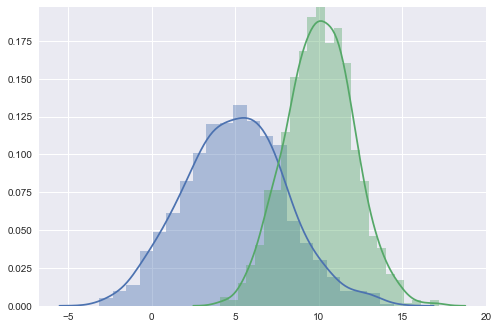

In [43]:
import seaborn as sns
mean1, sd1 = 5, 3 # dist 1 
mean2, sd2 = 10,2 # dist 2 
d1 = np.random.normal(mean1, sd1, 1000)
d2 = np.random.normal(mean2, sd2, 1000)
sns.distplot(d1);
sns.distplot(d2);

So here can see that these distributions differ from each other and are not directly comparable. For a number of machine learning algorithms, and data visualization techniques, it is imperative that the the effect of scale of data should be removed first. Standardization allows this by converting converting a given distribution into a z-distribution and bring them to a common scale (mean = 0, sd = 1 - a standard normal distribution). Let's standardize above distributions and see the effect. 

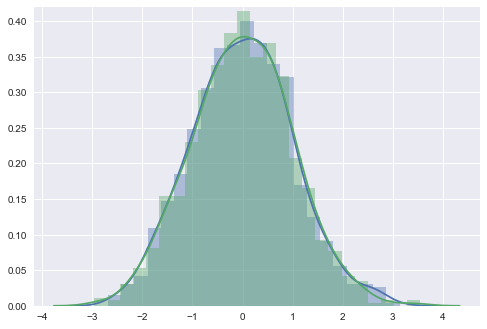

In [45]:
# Stardardizing and visualizing distributions

sns.distplot([(x - d1.mean())/d1.std() for x in d1]);
sns.distplot([(x - d2.mean())/d2.std() for x in d2]);


Here we can see that both distributions are directly comparable on a common standard scale. As mentioned earlier, this trick will come in handy with analytics experiments while training machine learning algorithms. 

## Level up (Optional) 

Try converting these standard distributions back to the original normal distributions using the formula given above. Visualize to see if they resemble our original distributions. 

## Summary

In this lesson we looked at a special case of normal distribution called the standrd normal distribution. We also saw how to convert any normal distribution to standrd normal distribution using the z-score. We shall continue on working on this notion in the following labs. 